# Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('housing_data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    505 non-null    float64
 1   ZN      505 non-null    float64
 2   INDUS   505 non-null    float64
 3   CHAS    505 non-null    int64  
 4   NOX     505 non-null    float64
 5   RM      499 non-null    float64
 6   AGE     505 non-null    float64
 7   DIS     505 non-null    float64
 8   RAD     505 non-null    int64  
 9   TAX     505 non-null    int64  
 10  PTRATO  505 non-null    float64
 11  B       505 non-null    float64
 12  LSTAT   505 non-null    float64
 13  MEDV    505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()

0    470
1     35
Name: CHAS, dtype: int64

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

## Train-Test Splitting

In [8]:
import numpy as np
def split_train_test(data, test_ration):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ration)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f'{train_set} ---------------- {test_set}')

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
75    0.10153   0.0  12.83     0  0.437  6.279   74.5  4.0522    5  398   
442   9.96654   0.0  18.10     0  0.740  6.485  100.0  1.9784   24  666   
15    1.05393   0.0   8.14     0  0.538  5.935   29.3  4.4986    4  307   
325   0.30347   0.0   7.38     0  0.493  6.312   28.9  5.4159    5  287   
388   8.15174   0.0  18.10     0  0.700  5.390   98.9  1.7281   24  666   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
106   0.13117   0.0   8.56     0  0.520  6.127   85.2  2.1224    5  384   
270   0.16211  20.0   6.96     0  0.464  6.240   16.3  4.4290    3  223   
348   0.02899  40.0   1.25     0  0.429  6.939   34.5  8.7921    1  335   
435  14.42080   0.0  18.10     0  0.740  6.461   93.3  2.0026   24  666   
102   0.21161   0.0   8.56     0  0.520  6.137   87.4  2.7147    5  384   

     PTRATO       B  LSTAT  MEDV  
75     18.7  373.66  11.97  20.0  
442    20.2  386.73  18.85  1

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [11]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATO,B,LSTAT,MEDV
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,20.9
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6
476,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666,20.2,3.65,17.16,11.7
98,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
455,4.66883,0.0,18.10,0,0.713,5.976,87.9,2.5806,24,666,20.2,10.48,19.01,12.7


In [12]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [13]:
#  Khelna sirf train data kk sath hai

housing = strat_train_set.copy()

# Looking for Correlations

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

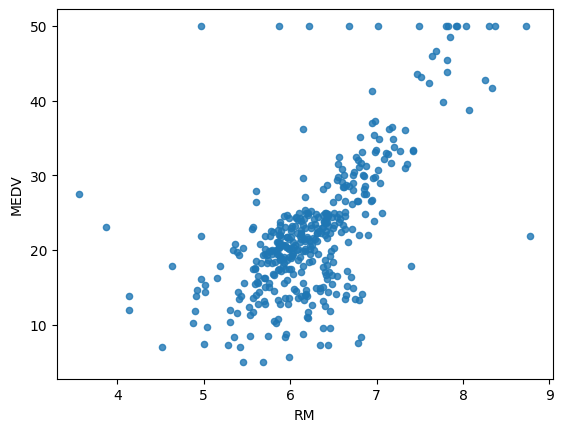

In [14]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=(0.8))

In [15]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [16]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATO,B,LSTAT,MEDV,TAXRM
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,20.9,53.607897
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6,48.277850
476,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0,125.565611
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4,47.508691
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2,47.180667


<AxesSubplot: xlabel='TAXRM', ylabel='MEDV'>

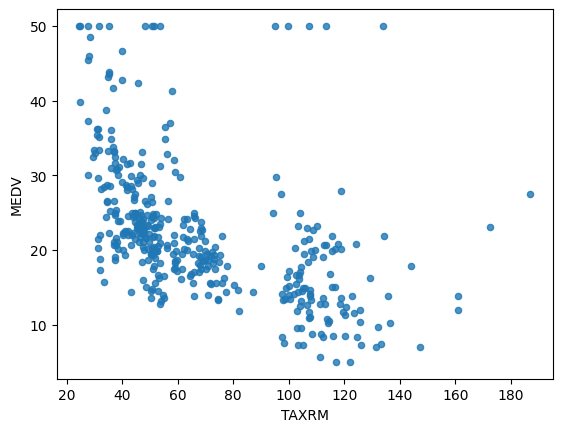

In [17]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=(0.8))

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>,
        <AxesSubplot: xlabel='TAXRM', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot: xlabel='TAXRM', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>,
        <AxesSubplot: xlabel='TAXRM', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSu

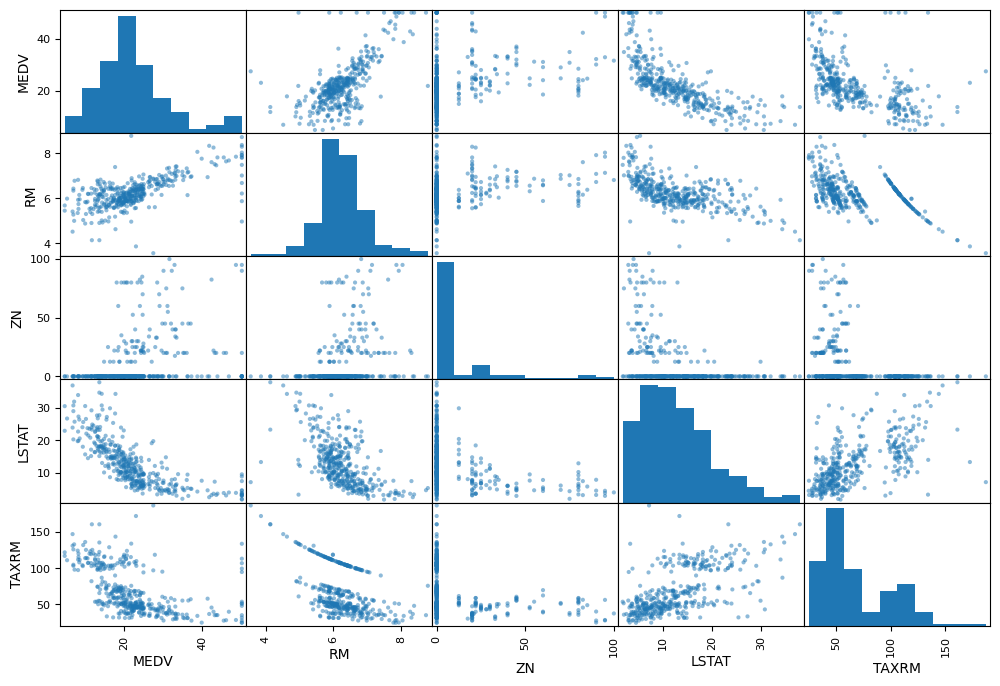

In [18]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'RM', 'ZN', 'LSTAT', 'TAXRM']
scatter_matrix(housing[attributes], figsize=(12, 8))

In [19]:
cor_matrix = housing.corr()
cor_matrix['MEDV'].sort_values(ascending=False)

MEDV      1.000000
RM        0.660407
B         0.344609
ZN        0.329206
DIS       0.231680
CHAS      0.215042
RAD      -0.362619
AGE      -0.378913
CRIM     -0.397993
NOX      -0.421815
TAX      -0.441617
INDUS    -0.448303
PTRATO   -0.486045
TAXRM    -0.511529
LSTAT    -0.739129
Name: MEDV, dtype: float64

# #  Seperating features and labels

In [20]:
# Here label is MEDV ie price (Because we want to predict Money of each house) and rest other attributes are features

In [21]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

# Missing Attributes

In [22]:
# What  should be done
#     1. delete the columns of missing data
#     2. delete the the whole attribue
#     3. putting 0, mean or median value

In [23]:
#   Option: 1
a = housing.dropna(subset="RM")
a.shape
#  Real value will not change untill we put inplace=True

(399, 13)

In [24]:
# Option: 2
housing.drop("RM", axis=1).shape

(404, 12)

In [25]:
#  Option: 3 In This case we will use this option (op:1 if there would be lot of points this op will fail)
#                                                 (op:2 RM has high correlation with MEDV ie price)
median = housing["RM"].median()
housing["RM"].fillna(median)

254    5.876
348    6.939
476    5.304
321    6.041
326    6.083
       ...  
154    6.152
423    5.565
98     7.416
455    5.976
215    5.888
Name: RM, Length: 404, dtype: float64

In [26]:
housing['RM'].shape

(404,)

In [27]:
# Fitting the  missing data using Imputer (This will fill data in all the attributes)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)


SimpleImputer(strategy='median')

In [28]:
imputer.statistics_

array([2.9025e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.1850e+00, 7.7500e+01, 3.1675e+00, 5.0000e+00, 3.3600e+02,
       1.9050e+01, 3.9094e+02, 1.1570e+01])

In [29]:
X = imputer.transform(housing)

#   Creating new DataFrame

housing_tr = pd.DataFrame(X, columns=housing.columns)

In [30]:
housing.describe()  # Old data with missing attributes(only RM values are missing in this case but can have missing data in all attributes)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.252564,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.692252,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.873000,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.185000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.605000,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [31]:
housing_tr.describe()  # New data without missing attributes.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.251728,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.687985,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.874750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.185000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.597250,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Scikit-learn Design

Three types of Designs : 
1. Estimaters -> Estimates some parameters base on a dataset. Eg - Imputers

2. transformers -> takes inputs and give output based on learning from fit()
There is also convenience function called fit_transform() which first fits the data and then transforms it.

3. Predictors -> LinearRegression --> fit and preditct
It also gives some score functions which will  evaluate the predictions.


# Feature Scaling

This is done to make all the datasets(features) in same range --> Its necessery for pipeline

Primarly, Two types of feature scaling
1. Min-Max scaling or Normalization
          (value-min)/(max-min) ==> Sari Values 0-1 ajaygi aise
          Sklearn provides a class called MinMaxScaler for this

2. Standardization
            (value-min)/std
            std - standard deviation
            Sklearn provides a class called StandardScaler for this

we will use Standardization in this case as MinMax makes impact on all the values but Standardization doesn't..


# Creating a PipeLine

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
   # .......Add as many as pipeline you want
    ('std_scaler', StandardScaler()),
])

In [33]:
housing_num_tr = my_pipeline.fit_transform(housing_tr) # Dono Dataset use kr skte hai housing_tr bhi farak nhh pdega 

In [34]:
housing_num_tr.shape

(404, 13)

# Selecting desired model for a problem (here Real Estate)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# model = LinearRegression()
# model = DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [36]:
some_data = housing.iloc[:10]
some_labels = housing_labels[:10]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

C:\Users\rkesh\AppData\Local\Temp\ipykernel_16312\3821800098.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  some_labels = housing_labels[:10]


array([20.581, 27.349, 12.608, 20.754, 21.813, 16.365, 25.817, 26.039,
       14.35 , 23.488])

In [37]:
list(some_labels)

[20.9, 26.6, 12.0, 20.4, 22.2, 17.9, 24.8, 26.5, 14.5, 23.3]

# Evaluating the Model

In [38]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)

In [39]:
rmse = np.sqrt(mse)

IF value of rmse (root sq mean error) is    0    then it means that our model has overfitted the data which is not good

In [40]:
rmse

1.2044665934564054

# Cross Validation ==> Better Evaluation 

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10) #cv means no. of scores
rmse_scores = np.sqrt(-scores)

In [42]:
rmse_scores

array([3.24979731, 2.47870314, 5.35368022, 2.7280657 , 2.69348869,
       2.56537497, 2.85172646, 3.00306208, 2.08631438, 5.00481557])

In [43]:
def print_scores(scores):
    print(f"scores: {scores}" )
    print(f"Mean: {scores.mean()}")
    print(f"Standard Deviations: {scores.std()}")

In [44]:
print_scores(rmse_scores)

scores: [3.24979731 2.47870314 5.35368022 2.7280657  2.69348869 2.56537497
 2.85172646 3.00306208 2.08631438 5.00481557]
Mean: 3.2015028511527794
Standard Deviations: 1.0344478411857165


# Saving the Model

In [45]:
from joblib import load, dump
dump(model, 'Dragon.joblib')

['Dragon.joblib']

# Testing the Model on test data

In [52]:
test_feature = strat_test_set.drop("MEDV", axis=1)
test_label = strat_test_set["MEDV"].copy()

test_feature_prepared = my_pipeline.transform(test_feature)
final_predictions = model.predict(test_feature_prepared)
final_mse = mean_squared_error(test_label, final_predictions)
final_rmse = np.sqrt(final_mse)

# print(final_predictions, list(test_label))

[22.924 22.224 46.71  32.706 44.9   35.202 20.965 23.782 33.109 20.433
 19.485 28.748 21.711 32.886 20.262 19.069 12.886 21.07  27.752 19.785
 20.325 45.763 12.983 18.583 25.355 33.9   15.917 15.183  6.641 19.949
 23.463 23.083 18.178 14.729 20.99  18.286 22.22  16.913 45.449 17.645
 21.494 18.827 19.265 19.071 33.491  8.244 24.498 15.328 20.652 21.517
 46.4   23.903 15.033 21.716 19.702 46.851 24.831 19.908 34.081 10.784
 23.786 35.981 33.194 23.799 14.043 21.177 20.796 16.053 28.056 25.293
 23.36  32.935 19.497 32.707 10.877 19.977 43.215 19.428 19.537 14.366
 41.755  8.985 35.212 22.369 29.905 16.049 22.915 21.803 20.663 15.819
 26.232 10.403 32.501 13.109 25.391 19.961 33.242 13.819 20.83  21.305
 20.403] [24.6, 22.0, 44.8, 23.6, 48.8, 36.5, 19.7, 23.1, 34.6, 21.5, 23.1, 15.0, 23.0, 34.9, 18.5, 10.4, 10.2, 18.9, 23.9, 19.3, 19.4, 48.3, 10.9, 19.6, 27.5, 37.3, 16.1, 15.2, 10.5, 21.4, 23.2, 20.7, 21.7, 13.0, 22.3, 19.6, 21.2, 18.1, 50.0, 23.7, 22.6, 20.5, 18.9, 19.5, 32.7, 8.8, 29.1,

In [51]:
final_rmse

3.3923248052270014

In [58]:
test_feature_prepared[0]

array([-0.44013442, -0.46518961, -1.06560336, -0.27288841, -0.40628043,
        0.0920816 ,  0.17085751, -0.21713512, -0.5378728 , -0.6869536 ,
       -0.89971115,  0.44295111, -0.9099909 ])

# Using The Model :

In [59]:
from joblib import load, dump
import numpy as np
model = load("Dragon.joblib")
features = np.array([[-0.44013442, -0.46518961, -1.06560336, -0.27288841, -0.40628043,
        0.9920816 ,  10.17085751, -0.21713512, -0.5378728 , -0.6869536 ,
       -0.89971115,  0.44295111, -0.0099909 ]])
model.predict(features)

array([25.724])